In [1]:
pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/zalando-research/fashionmnist/")

Skipping, found downloaded files in "./fashionmnist" (use force=True to force download)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

Creating pandas dataframes for train and test datasets

In [5]:
train_df = pd.read_csv('/content/fashionmnist/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/fashionmnist/fashion-mnist_test.csv')


EDA

In [6]:
train_df.shape, test_df.shape

((60000, 785), (10000, 785))

In [7]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Converting the dataframes into numpy arrays of float32 type which is the acceptable form for TensorFlow and Keras

In [8]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

Rescaling X_train and X_test (not y_train and y_test) from 0, 255 to 0, 1

In [9]:
X_train = train_data[:, 1:]/255
X_test = test_data[:, 1:]/255
y_train = train_data[:, 0]
y_test = test_data[:, 0]

In [10]:
X_train.shape

(60000, 784)

Spliting the training data into train and validation 

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Visualising a random image

Text(0.5, 1.0, 'Ankle boot')

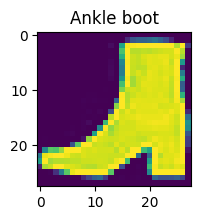

In [12]:
# Alter i to get desired image
i = 7

class_names = {0:'T_shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat',
               5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

plt.figure(figsize=(2,2))
plt.imshow(X_train[i].reshape(28,28))
label_index = int(y_train[i])
plt.title(class_names[label_index])

In [13]:
X_train.shape[0], X_test.shape[0]

(48000, 10000)

Defining the shape of the image as 3d with rows and columns and 1 for the 3d visualisation

In [14]:
image_rows = 28
image_cols = 28
input_shape = (image_rows, image_cols, 1)

In [15]:
X_train = X_train.reshape(X_train.shape[0], image_rows, image_cols, 1)
X_val = X_val.reshape(X_val.shape[0], image_rows, image_cols, 1)
X_test = X_test.reshape(X_test.shape[0], image_rows, image_cols, 1)

Defining a basic Convolutional Neural Network (CNN) model

In [16]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

In [17]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

Training the model by fitting the model to the training data

In [18]:
history = cnn_model.fit(
    X_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data= (X_val, y_val)
)

Epoch 1/75
12/12 [==============================] - 10s 182ms/step - loss: 1.8315 - accuracy: 0.4535 - val_loss: 1.2307 - val_accuracy: 0.6747
Epoch 2/75
12/12 [==============================] - 1s 72ms/step - loss: 0.9441 - accuracy: 0.7263 - val_loss: 0.7252 - val_accuracy: 0.7542
Epoch 3/75
12/12 [==============================] - 1s 68ms/step - loss: 0.6660 - accuracy: 0.7722 - val_loss: 0.6142 - val_accuracy: 0.7843
Epoch 4/75
12/12 [==============================] - 1s 68ms/step - loss: 0.5857 - accuracy: 0.7970 - val_loss: 0.5465 - val_accuracy: 0.8014
Epoch 5/75
12/12 [==============================] - 1s 68ms/step - loss: 0.5308 - accuracy: 0.8157 - val_loss: 0.5052 - val_accuracy: 0.8227
Epoch 6/75
12/12 [==============================] - 1s 62ms/step - loss: 0.4975 - accuracy: 0.8278 - val_loss: 0.4756 - val_accuracy: 0.8327
Epoch 7/75
12/12 [==============================] - 1s 72ms/step - loss: 0.4704 - accuracy: 0.8371 - val_loss: 0.4576 - val_accuracy: 0.8382
Epoch 8/75


Evaluation

In [19]:
score = cnn_model.evaluate(X_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2497
Test Accuracy : 0.9118
